In [1]:
import mediapipe as mp
import cv2
import time
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import time

# Импорт модулей mediapipe, необходимых для извлечения ключевых точек и их прорисовки
mpPose = mp.solutions.pose
pose = mpPose.Pose()
mpDraw = mp.solutions.drawing_utils # Модуль для отрисовки поз
points = mpPose.PoseLandmark # Ключевые точки позы
path_train = "DATASET/TRAIN/" # Путь к датасету
path_test = "DATASET/TEST/" # Путь к датасету

I0000 00:00:1743759003.510475  364946 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1743759003.516269  365034 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.0.2-arch1.2), renderer: AMD Radeon Graphics (radeonsi, renoir, ACO, DRM 3.61, 6.13.8-zen1-1-zen)


In [2]:
print('numpy',np.__version__)
print('cv2', cv2.__version__)
#print(time.__version__)
print('pandas', pd.__version__)
#print('os', os.__version__)
#print('python', python.__version__)
print('mediapipe', mp.__version__)

numpy 1.26.4
cv2 4.10.0
pandas 2.2.3
mediapipe 0.10.20


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [3]:
Key_Points_MediaPipe = ['Nose', 'LeftEyeInnerCorner', 'LeftEye', 'LefEyeOuterCorner', 
              'RightEyeInnerCorner', 'RightEye', 'RightEyeOuterCorner',
              'LeftEar', 'RightEar', 'MouthLeftCorner', 'MouthRightCorner', 'LeftShoulder', 'RightShoulder',
              'LeftElbow', 'RightElbow', 'LeftWrist', 'RightWrist', 'LeftLittleFinger', 'RightLittleFinger',
              'LeftIndexFinger', 'RightIndexFinger', 'LeftThumb', 'RightThumb', 
              'LeftHip', 'RightHip', 'LeftKnee', 'RightKnee', 'LeftAnkle', 'RightAnkle',
              'LeftHeel', 'RightHeel', 'TheIndexFingerOfTheLeftFoot', 'TheIndexFingerOfTheRightFoot'
]

In [4]:
 # Создание пустого датафрейма для последующего сохраниения ключевых точек
def init_data(Key_Points, full = True):
    data = []
    data.append("FileName")
    i = 0
    for p in points:
        x = Key_Points[i]
        data.append(x + "_x")
        data.append(x + "_y")
        if full:
            data.append(x + "_z")
            data.append(x + "_vis")
        i += 1
    data.append("target")
    #data.append("name_file")
    data = pd.DataFrame(columns = data) 
    return data

In [5]:
# Создание датасета каркасных моделей (набора ключевых точек и метки - названия позы)
def create_df_pos(path, name_file, full = True):
    data = init_data(Key_Points_MediaPipe, full)
    count = 0
    target = []
    count_files = {}
    for dr in os.listdir(path): # Перебор папок с видами поз
        count_file = 0
        for image in os.listdir(path+"/"+dr): # Перебор файлов в каждой папке
            temp = []
            img = cv2.imread(path+"/"+dr + "/" + image)
            count_file+=1
            # Копирование и конвертация изображения в RGB
            imageWidth, imageHeight = img.shape[:2]
            imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Преобразование BGR модели OpenCV в RGB модель, с которой работает MediaPipe
            # Обнаружение позы            
            results = pose.process(imgRGB) # Построение скелетной модели
            if results.pose_landmarks: # Если модель построена
                landmarks = results.pose_landmarks.landmark # Извлечение ключевых точек (ориентиров)
                temp = temp + [path + dr + "/" + image]
                for i,j in zip(points,landmarks):
                    temp = temp + [j.x, j.y]
                    if full:
                        temp = temp + [j.z, j.visibility] # Добавление ключевых точек
                temp = temp + [dr] # Добавление метки
                data.loc[count] = temp # Запись в дата фрейм
                count +=1
            else:
                print(path+"/"+dr + "/" + image)
        count_files[dr] = count_file
    data.to_csv(name_file) # Запись датафрейма ключевых точек в файл
    return count_files, data

In [6]:
# Построение диаграммы распределения скелетных моделей по классам
def paint_bar(data, s):
    df = data['target'].value_counts()
    label = list(df.index)
    counts = list(df.values)
    # Построение диаграммы распределения
    plt.bar(label, counts)
    plt.title('Распределение классов поз в ' + s + ' наборе')

In [7]:
# Построение датафрейма скелетных моделей обучающего набора
time_start = time.time()
count_files, data_tr = create_df_pos(path_train, 'dataset_train_mediapipe_short.csv', full = False)
time_end = time.time()
print('time: ',time_end-time_start)
print(count_files)
data_tr.head()

W0000 00:00:1743759003.582114  365012 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743759003.617745  365015 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743759003.641076  365015 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


DATASET/TRAIN//goddess/00000381.jpg
DATASET/TRAIN//goddess/00000264.jpg
DATASET/TRAIN//goddess/00000176.jpg
DATASET/TRAIN//goddess/00000377.jpg
DATASET/TRAIN//goddess/00000380.jpg
DATASET/TRAIN//goddess/00000191.jpg
DATASET/TRAIN//goddess/00000169.jpg


Corrupt JPEG data: premature end of data segment


DATASET/TRAIN//goddess/00000329.jpg
DATASET/TRAIN//goddess/00000193.png
DATASET/TRAIN//goddess/00000400.jpg
DATASET/TRAIN//goddess/00000272.png
DATASET/TRAIN//goddess/00000261.png
DATASET/TRAIN//goddess/00000146.jpg
DATASET/TRAIN//goddess/00000316.jpg
DATASET/TRAIN//downdog/00000416.jpg
DATASET/TRAIN//downdog/00000236.JPG
DATASET/TRAIN//downdog/00000280.jpg
DATASET/TRAIN//downdog/00000266.jpg
DATASET/TRAIN//downdog/00000188.png
DATASET/TRAIN//downdog/00000427.jpg
DATASET/TRAIN//downdog/00000314.jpg
DATASET/TRAIN//downdog/00000168.jpg
DATASET/TRAIN//downdog/00000222.jpg
DATASET/TRAIN//downdog/00000147.jpg
DATASET/TRAIN//downdog/00000306.jpg
DATASET/TRAIN//downdog/00000362.jpg
DATASET/TRAIN//downdog/00000194.jpg
DATASET/TRAIN//downdog/00000270.jpg
DATASET/TRAIN//downdog/00000237.jpg
DATASET/TRAIN//downdog/00000367.png
DATASET/TRAIN//downdog/00000212.png
DATASET/TRAIN//downdog/00000331.jpg
DATASET/TRAIN//downdog/00000221.jpg
DATASET/TRAIN//downdog/00000304.jpg
DATASET/TRAIN//downdog/00000

Premature end of JPEG file


DATASET/TRAIN//tree/File38.jpg
DATASET/TRAIN//tree/00000146.jpg
DATASET/TRAIN//tree/File66.jpg
DATASET/TRAIN//tree/00000077.jpg
DATASET/TRAIN//tree/00000073.jpg
time:  34.40872883796692
{'goddess': 180, 'downdog': 223, 'plank': 266, 'warrior2': 252, 'tree': 160}


,FileName,Nose_x,Nose_y,LeftEyeInnerCorner_x,LeftEyeInnerCorner_y,LeftEye_x,LeftEye_y,LefEyeOuterCorner_x,LefEyeOuterCorner_y,RightEyeInnerCorner_x,...,RightAnkle_y,LeftHeel_x,LeftHeel_y,RightHeel_x,RightHeel_y,TheIndexFingerOfTheLeftFoot_x,TheIndexFingerOfTheLeftFoot_y,TheIndexFingerOfTheRightFoot_x,TheIndexFingerOfTheRightFoot_y,target
0,DATASET/TRAIN/goddess/00000112.jpg,0.493766,0.222121,0.496200,0.210179,0.499173,0.210420,0.502757,0.210703,0.488961,...,0.827728,0.687218,0.859726,0.304926,0.857960,0.807848,0.861208,0.196012,0.866063,goddess
1,DATASET/TRAIN/goddess/00000190.jpg,0.505053,0.566703,0.515230,0.567998,0.521436,0.563396,0.527925,0.558942,0.499665,...,0.725124,0.776857,0.806021,0.303038,0.758405,0.836904,0.878963,0.255068,0.849323,goddess
2,DATASET/TRAIN/goddess/00000348.jpg,0.533278,0.219218,0.540201,0.198287,0.546034,0.197969,0.551659,0.197919,0.521057,...,0.914575,0.747026,0.946687,0.206615,0.954839,0.870732,0.928253,0.081815,0.972582,goddess
3,DATASET/TRAIN/goddess/00000115.jpg,0.461544,0.321562,0.471953,0.311228,0.480205,0.312310,0.488669,0.313453,0.447780,...,0.845757,0.671672,0.874287,0.245990,0.873823,0.742926,0.911795,0.153500,0.919718,goddess
4,DATASET/TRAIN/goddess/00000358.jpg,0.501235,0.425915,0.509250,0.406790,0.512528,0.407814,0.516012,0.408937,0.500690,...,0.842695,0.652517,0.856076,0.358518,0.860275,0.679483,0.919478,0.332570,0.902056,goddess


In [8]:
# Вывод характеристик датафрейма скелетных моделей обучающего набора
print(data_tr.info())

<class 'pandas.core.frame.DataFrame'>
Index: 969 entries, 0 to 968
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   FileName                        969 non-null    object 
 1   Nose_x                          969 non-null    float64
 2   Nose_y                          969 non-null    float64
 3   LeftEyeInnerCorner_x            969 non-null    float64
 4   LeftEyeInnerCorner_y            969 non-null    float64
 5   LeftEye_x                       969 non-null    float64
 6   LeftEye_y                       969 non-null    float64
 7   LefEyeOuterCorner_x             969 non-null    float64
 8   LefEyeOuterCorner_y             969 non-null    float64
 9   RightEyeInnerCorner_x           969 non-null    float64
 10  RightEyeInnerCorner_y           969 non-null    float64
 11  RightEye_x                      969 non-null    float64
 12  RightEye_y                      969 non-n

target
warrior2    232
plank       230
downdog     195
goddess     166
tree        146
Name: count, dtype: int64


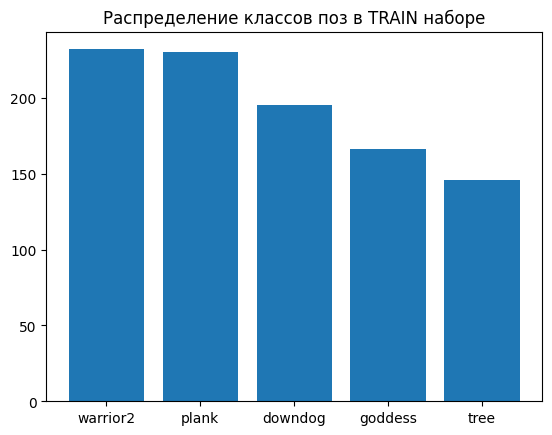

In [9]:
print(data_tr['target'].value_counts())
paint_bar(data_tr, 'TRAIN')
# Отображение гистограммы
plt.show()

In [10]:
# Построение датафрейма скелетных моделей тестового набора
time_start = time.time()
count_files, data_te = create_df_pos(path_test, 'dataset_test_mediapipe_short.csv', full = False)
time_end = time.time()
print('time: ',time_end-time_start)
print(count_files)
data_te.head()

DATASET/TEST//goddess/00000068.jpg
DATASET/TEST//goddess/00000056.jpg


libpng warning: iCCP: known incorrect sRGB profile


DATASET/TEST//goddess/00000047.png
DATASET/TEST//goddess/00000045.jpg
DATASET/TEST//downdog/00000092.jpg
DATASET/TEST//downdog/00000106.jpg
DATASET/TEST//downdog/00000127.png
DATASET/TEST//downdog/00000062.jpg
DATASET/TEST//downdog/00000011.jpg
DATASET/TEST//downdog/00000103.jpg
DATASET/TEST//downdog/00000012.jpg
DATASET/TEST//downdog/00000120.jpg
DATASET/TEST//downdog/00000090.jpg
DATASET/TEST//plank/00000115.jpg
DATASET/TEST//plank/00000106.jpg
DATASET/TEST//plank/00000021.jpg
DATASET/TEST//plank/00000029.jpg
DATASET/TEST//plank/00000091.jpg
DATASET/TEST//plank/00000124.jpg
DATASET/TEST//plank/00000054.png
DATASET/TEST//plank/00000008.jpg
DATASET/TEST//plank/00000022.jpg
DATASET/TEST//plank/00000079.png
DATASET/TEST//plank/00000127.jpg
DATASET/TEST//plank/00000123.jpg
DATASET/TEST//plank/00000109.jpg
DATASET/TEST//plank/00000045.jpg
DATASET/TEST//plank/00000002.jpg
DATASET/TEST//plank/00000071.jpg
DATASET/TEST//plank/00000052.jpg
DATASET/TEST//plank/00000094.jpg
DATASET/TEST//warrior

libpng warning: iCCP: known incorrect sRGB profile


DATASET/TEST//tree/00000061.jpg
DATASET/TEST//tree/00000059.jpg


libpng warning: iCCP: known incorrect sRGB profile


DATASET/TEST//tree/00000019.png
DATASET/TEST//tree/00000018.jpg
time:  17.5114529132843
{'goddess': 80, 'downdog': 97, 'plank': 115, 'warrior2': 109, 'tree': 69}


,FileName,Nose_x,Nose_y,LeftEyeInnerCorner_x,LeftEyeInnerCorner_y,LeftEye_x,LeftEye_y,LefEyeOuterCorner_x,LefEyeOuterCorner_y,RightEyeInnerCorner_x,...,RightAnkle_y,LeftHeel_x,LeftHeel_y,RightHeel_x,RightHeel_y,TheIndexFingerOfTheLeftFoot_x,TheIndexFingerOfTheLeftFoot_y,TheIndexFingerOfTheRightFoot_x,TheIndexFingerOfTheRightFoot_y,target
0,DATASET/TEST/goddess/00000016.jpg,0.356858,0.713435,0.392314,0.673012,0.403592,0.662877,0.414130,0.654046,0.365885,...,1.421044,0.691064,2.051450,0.647391,1.656695,0.687782,2.253654,0.662357,2.128037,goddess
1,DATASET/TEST/goddess/00000057.jpg,0.151072,0.509166,0.159831,0.451362,0.162652,0.448447,0.165760,0.445800,0.148736,...,0.711823,0.296493,0.724089,0.366305,0.685951,0.372376,0.646372,0.470702,0.681306,goddess
2,DATASET/TEST/goddess/00000036.jpg,-0.197921,0.888486,-0.173013,0.830324,-0.160213,0.829726,-0.147193,0.829391,-0.204358,...,1.157676,-0.125177,1.205311,-0.103647,1.175346,-0.111461,1.151745,-0.093827,1.137576,goddess
3,DATASET/TEST/goddess/00000088.jpg,-0.390627,1.017497,-0.389838,0.905940,-0.378102,0.900573,-0.366207,0.895739,-0.420352,...,1.934729,0.066779,2.061766,0.122002,1.956244,0.066898,2.158196,0.132501,2.000463,goddess
4,DATASET/TEST/goddess/00000050.jpg,-0.856075,0.760729,-0.807522,0.651447,-0.789692,0.651542,-0.771837,0.651887,-0.846366,...,2.483815,-0.410214,2.638399,-0.414683,2.563254,-0.428691,2.692314,-0.433691,2.693499,goddess


<class 'pandas.core.frame.DataFrame'>
Index: 429 entries, 0 to 428
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   FileName                        429 non-null    object 
 1   Nose_x                          429 non-null    float64
 2   Nose_y                          429 non-null    float64
 3   LeftEyeInnerCorner_x            429 non-null    float64
 4   LeftEyeInnerCorner_y            429 non-null    float64
 5   LeftEye_x                       429 non-null    float64
 6   LeftEye_y                       429 non-null    float64
 7   LefEyeOuterCorner_x             429 non-null    float64
 8   LefEyeOuterCorner_y             429 non-null    float64
 9   RightEyeInnerCorner_x           429 non-null    float64
 10  RightEyeInnerCorner_y           429 non-null    float64
 11  RightEye_x                      429 non-null    float64
 12  RightEye_y                      429 non-n

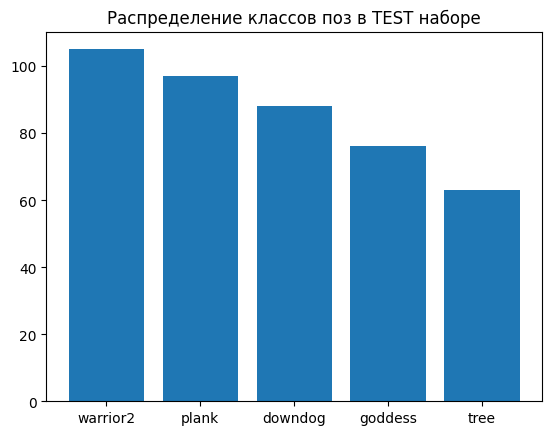

In [11]:
# Вывод характеристик датафрейма скелетных моделей тестового набора
print(data_te.info())
print(data_te['target'].value_counts())
paint_bar(data_te, 'TEST')
# Отображение гистограммы
plt.show()